In [4]:
import json
import os

#results_dir = "results/extendedTests/iot-coldstarts-6xni/"
#results_dir = "results/finalTests/IoT-normal-latency-7x1000/"
# results_dir = "results/finalTests/IoT-coldStart-latency-7x300/"
#results_dir = "results/finalTests/split-normal-latency-5x1000/"
#results_dir = "results/finalTests/split-coldStart-latency-6x300/"
#results_dir = "results/extendedTests/empty-200/"
results_dir = "../evalScripts/statistics/results/split-normal-A-2-x-100-x-2"
json_files = [pos_json for pos_json in os.listdir(results_dir) if pos_json.endswith('.json')]

data = []
for index, json_fn in enumerate(json_files):
    with open(os.path.join(results_dir, json_fn)) as in_file:
        fusion_group = json_fn.removesuffix('.json')
        content = json.load(in_file)
        print(f'Read fusion group {fusion_group} with {len(content)} lines')
        data.extend(content)

Read fusion group 1673018470 with 168 lines
Read fusion group 1673018179 with 91 lines


In [2]:
# This is a single invocation
# data[0]

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

sns.set(rc={'figure.figsize':(6,5)}, font_scale=1.0, style='whitegrid', font='CMU Sans Serif')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rc('axes', unicode_minus=False)

def save_fig(ax, name, file_type="pdf"):
    fig = ax.get_figure()
    fig.tight_layout()
    file_name = name + "." + file_type
    fig.savefig(os.path.join("graphs", file_name), bbox_inches='tight')


df = pd.DataFrame.from_dict(data)

# Get the smallest Start timestamp and remove it from every timestamp value
min_start_timestamp = df["startTimestamp"].min()
df["startTimestamp"] = df["startTimestamp"] - min_start_timestamp
df["endTimestamp"] = df["endTimestamp"] - min_start_timestamp
df["duration"] =  df["endTimestamp"] - df["startTimestamp"]
#df["fusionGroup"] = df["fusionGroup"].str.replace(",", "/")

df

,traceId,fusionGroup,source,currentFunction,currentTask,billedDuration,memoryAvail,maxMemoryUsed,isRootInvocation,startTimestamp,endTimestamp,internalDuration,calls,duration
0,1673018470-A-128-d8dc73e2620fb01985fd17f34e62fc20,1673018470,A,A,A,4650,128,100,True,258144,262792,4635,"[{'local': True, 'sync': False, 'caller': 'A',...",4648
1,1673018470-A-128-ac309bebf617cdfec560917ef82587c3,1673018470,A,A,A,4606,128,101,True,259157,263761,4591,"[{'local': True, 'sync': False, 'caller': 'A',...",4604
2,1673018470-A-128-ffcba397185990ce9694c82f38247a5a,1673018470,A,A,A,4621,128,100,True,264341,268967,4625,"[{'local': True, 'sync': False, 'caller': 'A',...",4626
3,1673018470-A-128-ad5f96548b861852d11fdf8de197b458,1673018470,A,A,A,4643,128,100,True,265356,269996,4628,"[{'local': True, 'sync': False, 'caller': 'A',...",4640
4,1673018470-A-128-6be0edc966b9b6db49fc67be28259c3c,1673018470,A,A,A,4629,128,100,True,267367,271397,4030,"[{'local': True, 'sync': False, 'caller': 'A',...",4030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,1673018179-A-128-f92e232daaf95924ff871b36c8a49b47,1673018179,A,A,A,4128,128,119,True,47268,51394,4125,"[{'local': True, 'sync': False, 'caller': 'A',...",4126
255,1673018179-A-128-da6d689631d23caf24250232e20595e9,1673018179,A,A,A,3794,128,119,True,47573,51366,3792,"[{'local': True, 'sync': False, 'caller': 'A',...",3793
256,1673018179-A-128-c1ebbda669b87233ec846a0c55a18908,1673018179,A,A,A,4055,128,118,True,48254,52307,4052,"[{'local': True, 'sync': False, 'caller': 'A',...",4053
257,1673018179-A-128-8433e5106e96cd9b55f2bed94130b58d,1673018179,A,A,A,3992,128,123,True,48580,52571,3990,"[{'local': True, 'sync': False, 'caller': 'A',...",3991


In [7]:
print(f'Unique Invocations: {df["traceId"].nunique()}')

Unique Invocations: 190


<AxesSubplot: ylabel='billedDuration'>

findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


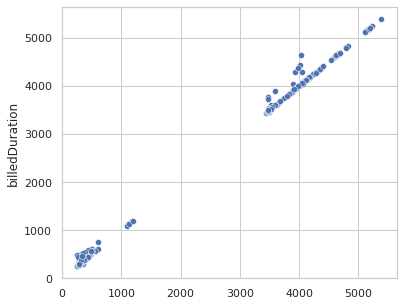

In [8]:
sns.scatterplot(data=df, x=df["endTimestamp"]-df["startTimestamp"], y="billedDuration")

findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


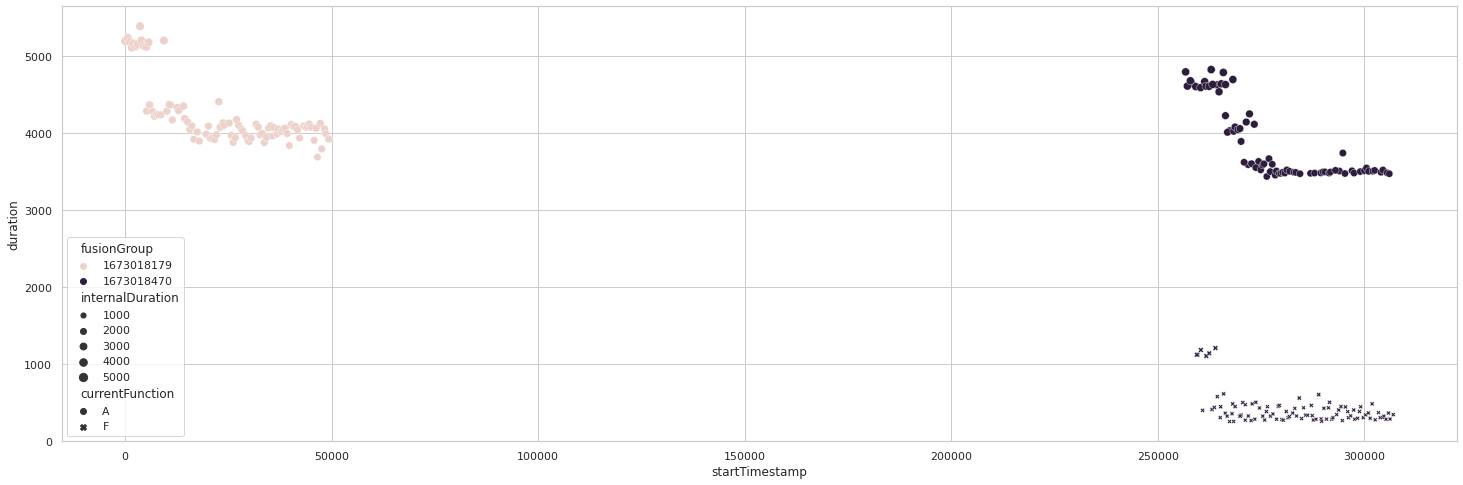

In [9]:
plt.figure(figsize=(25,8))
sns.scatterplot(data=df, x="startTimestamp", y="duration", size="internalDuration", hue=df["fusionGroup"], style="currentFunction")
plt.savefig("pointCloud.pdf")

<AxesSubplot: xlabel='startTimestamp', ylabel='10s_billedDuration_avg'>

findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


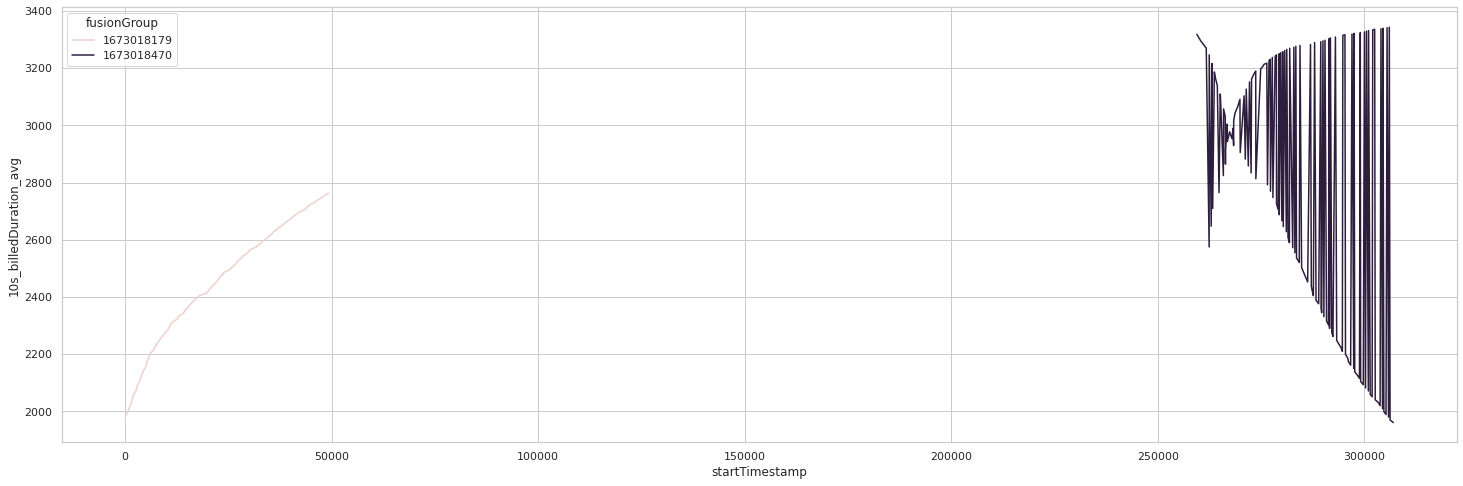

In [10]:
plt.figure(figsize=(25,8))
df['10s_billedDuration_avg'] = df['billedDuration'].rolling(10000, min_periods=30).mean()
#df['10s_billedDuration_med'] = df['billedDuration'].rolling(10000, min_periods=30).median()
sns.lineplot(data=df, x="startTimestamp", y="10s_billedDuration_avg", hue=df["fusionGroup"])
#sns.lineplot(data=df, x="startTimestamp", y="10s_billedDuration_med", hue=df["fusionGroup"])
#sns.scatterplot(data=df, x="startTimestamp", y="billedDuration", hue=df["fusionGroup"], legend=None)

In [11]:
# Now do not count every invocation, but sort the df by the cost of trace
grouped = df.groupby('traceId').agg({'billedDuration': ['sum'], 'startTimestamp': ['min'], 'endTimestamp': ['max'], 'fusionGroup': 'min'})
#grouped['numInvocations'] = df.groupby('traceId').count()
grouped['numInvocations'] = df.groupby('traceId').size()
print(f'Total Number of Invocations should be: {grouped["numInvocations"].sum()} == {len(df.index)}')

# Grouped: Get Root Invocation of TraceId and get rootEndTimestamp
# Pandas join() oder merge() machen mit dem alten Dataframe. Merge ist einfacher
rootInvocations = df[df["isRootInvocation"]][["traceId", "endTimestamp"]].rename(columns={"endTimestamp": "rootEndTimestamp"})
grouped = pd.merge(grouped, rootInvocations, how="left", on="traceId")
grouped["rootDuration"] = grouped["rootEndTimestamp"] - grouped["startTimestamp", "min"]

grouped

Total Number of Invocations should be: 259 == 259


/tmp/ipykernel_208103/2807751757.py:10: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  grouped = pd.merge(grouped, rootInvocations, how="left", on="traceId")


,traceId,"(billedDuration, sum)","(startTimestamp, min)","(endTimestamp, max)","(fusionGroup, min)","(numInvocations, )",rootEndTimestamp,rootDuration
0,1673018179-A-128-0341b0a802fbe88efe1eea5a32c7d7a9,4090,41244,45332,1673018179,1,45332.0,4088.0
1,1673018179-A-128-08085cbcd2d41a0b70605e3aa0bbbfeb,4076,43736,47811,1673018179,1,47811.0,4075.0
2,1673018179-A-128-0916e171b1be2c958078ac45696c026c,3988,36733,40721,1673018179,1,40721.0,3988.0
3,1673018179-A-128-0bdec1cfef19be11e8d1f17711dfc0b2,4282,15646,19692,1673018179,1,19692.0,4046.0
4,1673018179-A-128-0e03ca2abe47053e5232c91c4aad9c9c,3945,34233,38176,1673018179,1,38176.0,3943.0
...,...,...,...,...,...,...,...,...
185,1673018470-A-128-fba2391730b366fa929f222af54f46ba,3780,293959,297465,1673018470,2,297465.0,3506.0
186,1673018470-A-128-fe099d023e40a966ec638c226999dc41,290,284798,285087,1673018470,1,NaN,NaN
187,1673018470-A-128-ff41ffe6a71183b49f9f9c5f6405d4f1,3862,296986,300496,1673018470,2,300496.0,3510.0
188,1673018470-A-128-ffcba397185990ce9694c82f38247a5a,4981,264341,268967,1673018470,2,268967.0,4626.0


findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


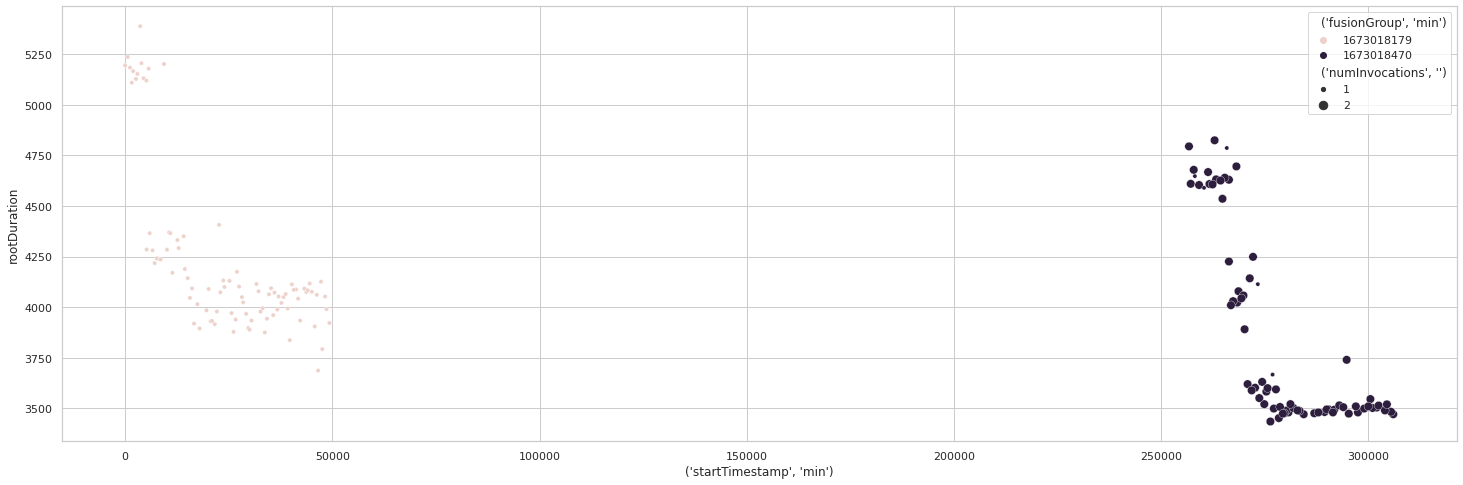

In [12]:
plt.figure(figsize=(25,8))
sns.scatterplot(data=grouped, x=grouped['startTimestamp', 'min'] , y=grouped['rootDuration'], hue=grouped['fusionGroup', 'min'], size=grouped["numInvocations", ""])
plt.savefig("duration.pdf")

findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


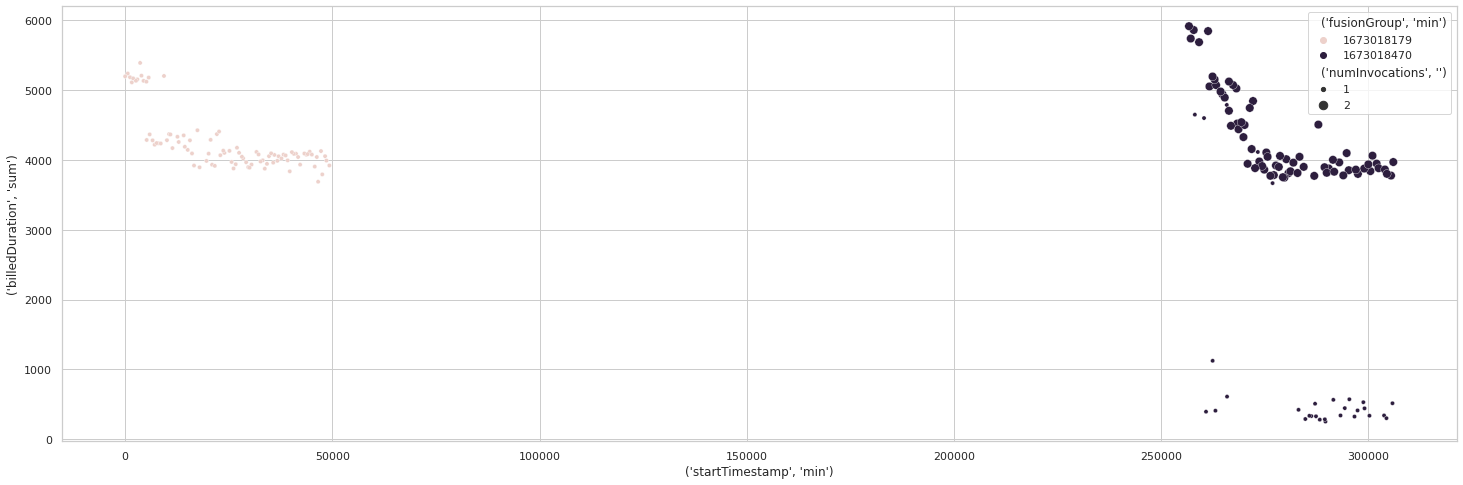

In [13]:
plt.figure(figsize=(25,8))
sns.scatterplot(data=grouped, x=grouped['startTimestamp', 'min'] , y=grouped['billedDuration', 'sum'], hue=grouped['fusionGroup', 'min'], size=grouped["numInvocations", ""])
plt.savefig("billed.pdf")

In [14]:
grouped[grouped["rootDuration"] <= 1000]

,traceId,"(billedDuration, sum)","(startTimestamp, min)","(endTimestamp, max)","(fusionGroup, min)","(numInvocations, )",rootEndTimestamp,rootDuration


findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


[1673018179 1673018470]


findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


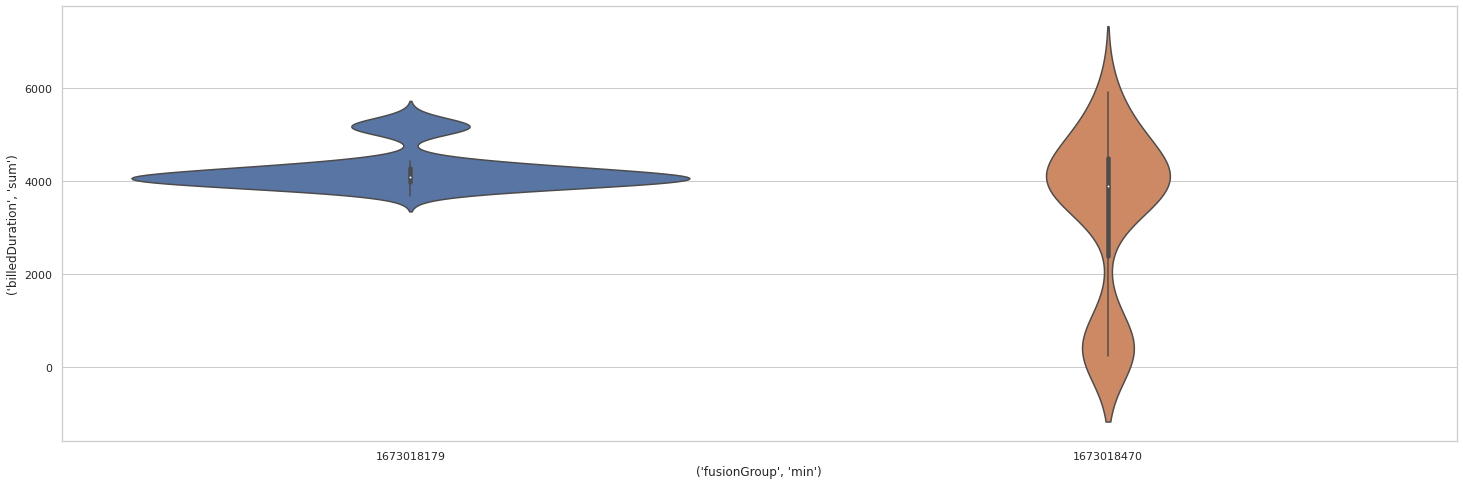

In [15]:
plt.figure(figsize=(25,8))
fusion_groups_order = pd.unique(grouped.sort_values(by="rootEndTimestamp")['fusionGroup', 'min'])
print(fusion_groups_order)
sns.violinplot(data=grouped, x=grouped['fusionGroup', 'min'] , y=grouped['billedDuration', 'sum'], order=fusion_groups_order)
plt.savefig("violinBilled.pdf")

findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


[1673018179 1673018470]


findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


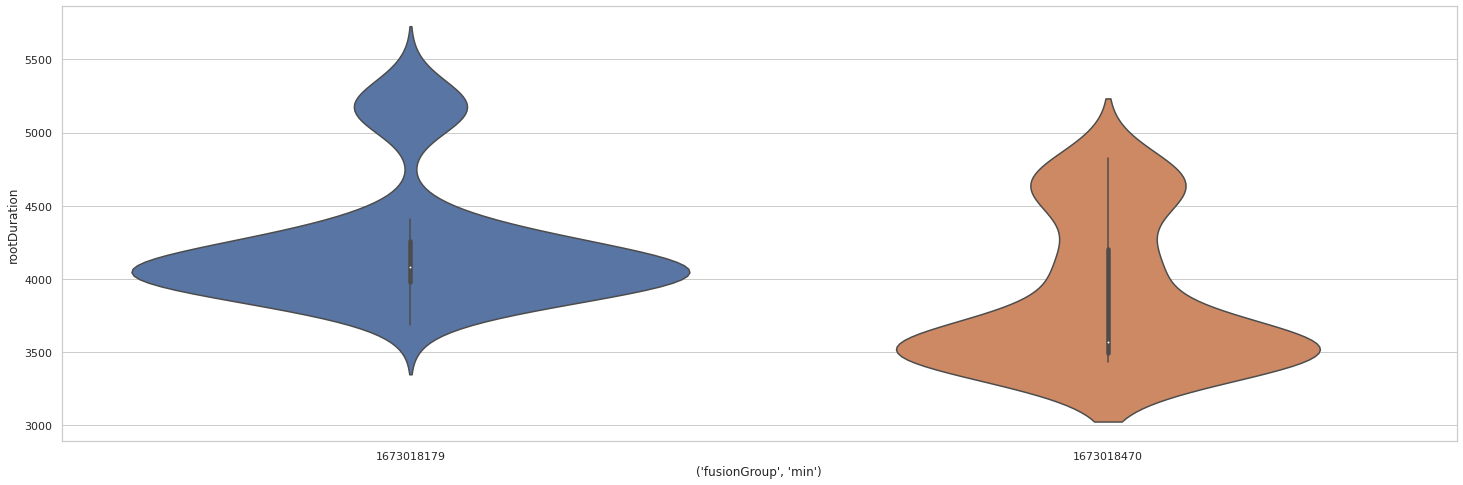

In [16]:
plt.figure(figsize=(25,8))
fusion_groups_order = pd.unique(grouped.sort_values(by="rootEndTimestamp")['fusionGroup', 'min'])
print(fusion_groups_order)
sns.violinplot(data=grouped, x=grouped['fusionGroup', 'min'] , y=grouped['rootDuration'], order=fusion_groups_order)
plt.savefig("violinRR.pdf")

findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


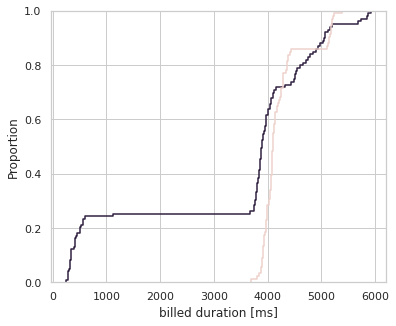

In [17]:
ax = sns.ecdfplot(data=grouped, x=grouped['billedDuration', 'sum'], hue=grouped['fusionGroup', 'min'], hue_order=fusion_groups_order, legend=None)
plt.xlabel("billed duration [ms]")
#ax.get_legend().set_title("Fusion Setup")
#ax.set(xlim=(7000,20000))
plt.savefig("ecdfBilled.pdf")

findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


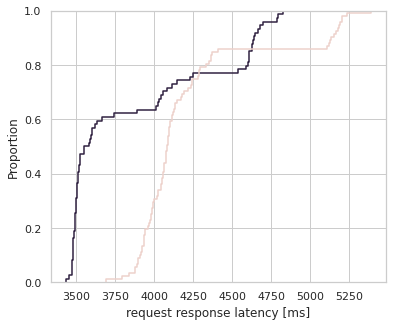

In [18]:
ax = sns.ecdfplot(data=grouped, x=grouped['rootDuration'], hue=grouped['fusionGroup', 'min'], hue_order=fusion_groups_order, legend=None)
plt.xlabel("request response latency [ms]")
#ax.get_legend().set_title("Fusion Group")
#ax.set(xlim=(1700,4500))
plt.savefig("ecdfRR.pdf")

In [19]:
from scipy.stats import t

In [21]:
# Calculate Mean and Confidence Interval of billed duration and rootDuration

def printMeanAndCi(x, name=""):
    m = x.mean() 
    s = x.std() 
    dof = len(grouped)-1 
    confidence = 0.95

    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    print(f'Mean: {m:7.2f}, Confidence Interval: ({m-s*t_crit/np.sqrt(len(x)):7.2f} / {m+s*t_crit/np.sqrt(len(x)):7.2f}), Median: {x.median()} for {name}')

print("overall")
printMeanAndCi(grouped["rootDuration"], "rootDuration")
printMeanAndCi(grouped['billedDuration', 'sum'], "billedDuration")
for group in fusion_groups_order:
    filtered = grouped[grouped['fusionGroup', 'min'] == group]
    print(group)
    printMeanAndCi(filtered["rootDuration"], f'rootDuration')
    printMeanAndCi(filtered['billedDuration', 'sum'], f'billedDuration')

overall
Mean: 4064.38, Confidence Interval: (3995.49 / 4133.26), Median: 4044.0 for rootDuration
Mean: 3766.39, Confidence Interval: (3567.93 / 3964.86), Median: 4046.5 for billedDuration
1673018179
Mean: 4227.10, Confidence Interval: (4141.02 / 4313.18), Median: 4084.0 for rootDuration
Mean: 4243.22, Confidence Interval: (4157.54 / 4328.90), Median: 4093.0 for billedDuration
1673018470
Mean: 3864.27, Confidence Interval: (3768.50 / 3960.04), Median: 3567.0 for rootDuration
Mean: 3328.10, Confidence Interval: (2976.45 / 3679.75), Median: 3897.0 for billedDuration


In [22]:
df["calls"]


0      [{'local': True, 'sync': False, 'caller': 'A',...
1      [{'local': True, 'sync': False, 'caller': 'A',...
2      [{'local': True, 'sync': False, 'caller': 'A',...
3      [{'local': True, 'sync': False, 'caller': 'A',...
4      [{'local': True, 'sync': False, 'caller': 'A',...
                             ...                        
254    [{'local': True, 'sync': False, 'caller': 'A',...
255    [{'local': True, 'sync': False, 'caller': 'A',...
256    [{'local': True, 'sync': False, 'caller': 'A',...
257    [{'local': True, 'sync': False, 'caller': 'A',...
258    [{'local': True, 'sync': False, 'caller': 'A',...
Name: calls, Length: 259, dtype: object

In [23]:
calls = df["calls"]
calls = np.concatenate(list(calls)).ravel()
calledI = np.array(list(filter(lambda el: el["called"] == "I", calls)))
#df["acutalInternalDuration"] = df.apply(lambda row: np.vectorize(lambda obj: obj["time"])(np.array(list(filter(lambda el: el["called"] == "I",np.concatenate(list(row["calls"])).ravel())))), axis=1)

#df.apply(lambda row: np.vectorize(lambda obj: obj["time"])(np.array(list(filter(lambda el: el["called"] == "I",np.concatenate(list(row["calls"])).ravel())))), axis=1)
#np.vectorize(lambda obj: obj["time"])(calledI)

In [24]:
def get_call_time_for_row(row):
    calls = list(np.array(row["calls"]).flat)
    #calls = np.concatenate(calls).ravel()
    calledI = np.array(list(filter(lambda el: el["called"] == el["caller"], calls)))
    return  calledI[0]["time"] if len(calledI) > 0 else -1
df["actualInternalDuration"] = df.apply(lambda row: get_call_time_for_row(row), axis=1)

findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


all: mean: 24.494208494208493 median: 2.0 stdev: 46.19719870164037 25perc: 1.0 75perc: 21.0 90perc: 79.0 99perc: 199.83999999999997 max:218 len: 259 coldMean: 60.32673267326733 coldStd: 58.132281722101894 warmMean: 1.5886075949367089 warmStd: 0.8149068708109017



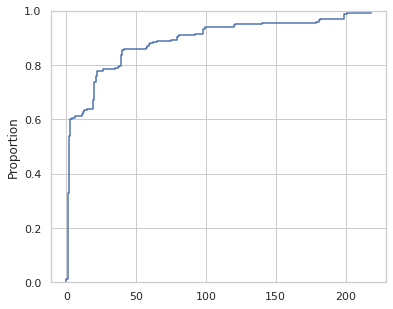

findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


root: mean: 2.7515151515151515 median: 1.0 stdev: 4.461769938376556 25perc: 1.0 75perc: 2.0 90perc: 3.0 99perc: 22.0 max:26 len: 165 coldMean: 17.75 coldStd: 4.807664335582962 warmMean: 1.5751633986928104 warmStd: 0.8086116306224185



findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.
findfont: Font family 'CMU Sans Serif' not found.


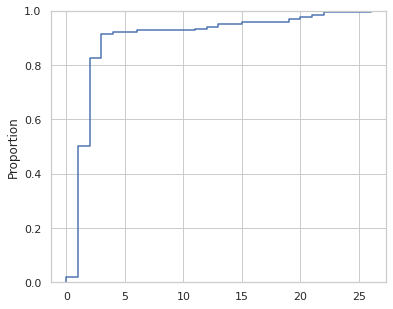

In [25]:
# Calculate the overhead of the handler

def calculate_handler_overhead(df, name = ""):
    # df = df[df["actualInternalDuration"] >= 0]
    oh = df["duration"] - df["actualInternalDuration"]
    warm = oh[oh <= 10]#oh[df["isColdStart"] == False]
    cold = oh[oh > 10]#oh[df["isColdStart"] == True]
    print(f'{name}: mean: {oh.mean()} median: {oh.median()} stdev: {oh.std()} 25perc: {oh.quantile(0.25)} 75perc: {oh.quantile(0.75)} 90perc: {oh.quantile(0.90)} 99perc: {oh.quantile(0.99)} max:{oh.max()} len: {len(oh)} coldMean: {cold.mean()} coldStd: {cold.std()} warmMean: {warm.mean()} warmStd: {warm.std()}\n')
    sns.ecdfplot(data=df, x=df["duration"] - df["actualInternalDuration"])
    plt.show()

calculate_handler_overhead(df, "all")
calculate_handler_overhead(df[df['isRootInvocation'] == True], "root")

In [ ]:
df[df["isColdStart"] == True]

,traceId,fusionGroup,source,currentFunction,billedDuration,maxMemoryUsed,isRootInvocation,isColdStart,memory,startTimestamp,endTimestamp,internalDuration,calls,duration,10s_billedDuration_avg,actualInternalDuration
